In [1]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('Salaries.csv')
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [2]:
df.shape

(148654, 13)

In [3]:
df.JobTitle

0         GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
1                        CAPTAIN III (POLICE DEPARTMENT)
2                        CAPTAIN III (POLICE DEPARTMENT)
3                   WIRE ROPE CABLE MAINTENANCE MECHANIC
4           DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)
                               ...                      
148649                                         Custodian
148650                                      Not provided
148651                                      Not provided
148652                                      Not provided
148653                        Counselor, Log Cabin Ranch
Name: JobTitle, Length: 148654, dtype: object

In [4]:
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

In [5]:
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [6]:
df['BasePay'].fillna('-', inplace=True)
df['Benefits'].fillna('-', inplace=True)
df['Notes'].fillna('-', inplace=True)
df['Status'].fillna('-', inplace=True)
#تم ملء القيم المفقودة بالقيمة -1 أفضل من حذف هذه الصفوفو الأعمدة التي تحوي بيانات مفقودة كي لا تؤثر على الخرج

In [7]:
average_salary = df['TotalPay'].mean()
average_salary

74768.321971703

In [8]:
median_salary = df['TotalPay'].median()
median_salary

71426.60999999999

In [9]:
mode_salary = df['TotalPay'].mode()
mode_salary

0    0.0
Name: TotalPay, dtype: float64

In [10]:
minimum_salary = df['TotalPay'].min()
minimum_salary

-618.13

In [11]:
maximum_salary = df['TotalPay'].max()
maximum_salary

567595.43

In [12]:
salary_range = maximum_salary - minimum_salary
salary_range

568213.56

In [13]:
standard_deviation = df['TotalPay'].std()
standard_deviation

50517.005273949944

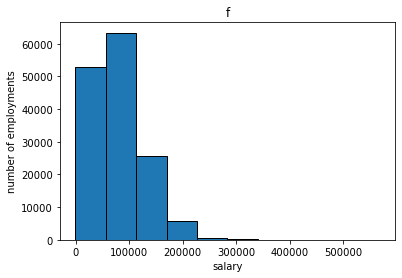

In [14]:
import matplotlib.pyplot as plt
plt.hist(df['TotalPay'], bins=10, edgecolor='black')
plt.xlabel('salary')
plt.ylabel('number of employments')
plt.title('f')
plt.show()

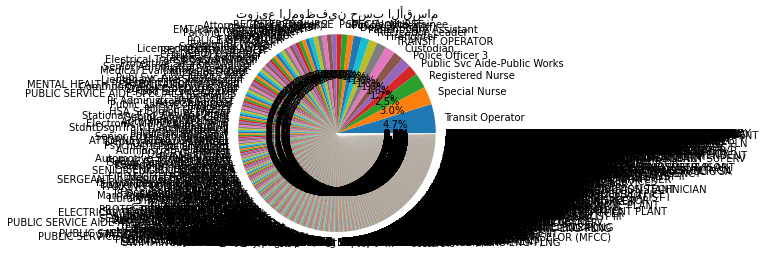

In [17]:
department_counts = df['JobTitle'].value_counts()
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%')
plt.title('توزيع الموظفين حسب الأقسام')
plt.axis('equal')
plt.show()

In [27]:

# تجميع البيانات حسب الأقسام وحساب إحصائيات الملخص لكل مجموعة
grouped_data = df.groupby('JobTitle')['TotalPay'].mean()

# طباعة النتائج
print(grouped_data)
# df['all']=df['grouped_data']
# df.head()

JobTitle
ACCOUNT CLERK                                     44035.664337
ACCOUNTANT                                        47429.268000
ACCOUNTANT INTERN                                 29031.742917
ACPO,JuvP, Juv Prob (SFERS)                       62290.780000
ACUPUNCTURIST                                     67594.400000
                                                      ...     
X-RAY LABORATORY AIDE                             52705.880385
X-Ray Laboratory Aide                             50823.942700
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS    53632.870000
Youth Comm Advisor                                41414.307500
ZOO CURATOR                                       66686.560000
Name: TotalPay, Length: 2159, dtype: float64


In [28]:

# مقارنة متوسط الرواتب
max_salary = grouped_data.max()
min_salary = grouped_data.min()
diff_salary = max_salary - min_salary

print("أعلى متوسط راتب:", max_salary)
print("أدنى متوسط راتب:", min_salary)
print("فارق المتوسط:", diff_salary)

أعلى متوسط راتب: 399211.275
أدنى متوسط راتب: 0.0
فارق المتوسط: 399211.275


In [29]:

#تجميع البيانات حسب الأعمدة المحددة
grouped_data = df.groupby(['JobTitle', 'TotalPay'])['JobTitle'].sum()

# طباعة النتائج
print(grouped_data)

JobTitle            TotalPay
ACCOUNT CLERK       614.00                   ACCOUNT CLERK
                    1630.00     ACCOUNT CLERKACCOUNT CLERK
                    8751.40                  ACCOUNT CLERK
                    11247.02                 ACCOUNT CLERK
                    17737.91                 ACCOUNT CLERK
                                           ...            
Youth Comm Advisor  19212.71            Youth Comm Advisor
                    36465.91            Youth Comm Advisor
                    52433.88            Youth Comm Advisor
                    57544.73            Youth Comm Advisor
ZOO CURATOR         66686.56                   ZOO CURATOR
Name: JobTitle, Length: 140570, dtype: object


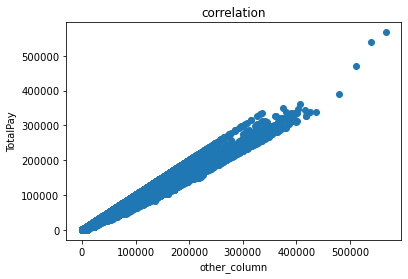

قيمة الارتباط: 0.9773128522072128


In [37]:

# حدد الأعمدة المطلوبة للتحليل
salary = df['TotalPay']
other_column = df['TotalPayBenefits']

# حساب الارتباط بين الراتب والعمود الآخر
correlation = salary.corr(other_column)

# رسم المخطط المبعثر
plt.scatter(other_column,salary)
plt.xlabel('other_column')
plt.ylabel('TotalPay')
plt.title('correlation')
plt.show()

# طباعة قيمة الارتباط
print("قيمة الارتباط:", correlation)

In [ ]:
# تم إجراء تحليل لارتباط الراتب مع عمود آخر في مجموعة البيانات المقدمة. تم استخدام البيانات التالية:

# - الرواتب (TotalPay): يمثل مبلغ الراتب الذي يتقاضاه كل موظف.
# - عمود آخر: يمثل عمودًا رقميًا آخر في مجموعة البيانات.

# تم حساب قيمة الارتباط بين الرواتب والعمود الآخر وتم رسم مخطط مبعثر لتصور العلاقة بينهما.

# من خلال التحليلات، توصلنا إلى النتائج التالية:

# 1. قيمة الارتباط: تم حساب قيمة الارتباط بين الرواتب والعمود الآخر. قيمة الارتباط تتراوح بين -1 و1. إذا كانت القيمة إيجابية قرب الواحد، فهذا يشير إلى وجود ارتباط إيجابي بين الرواتب والعمود الآخر. إذا كانت القيمة سالبة قرب السالب واحد، فهذا يشير إلى وجود ارتباط سلبي بين الرواتب والعمود الآخر. وإذا كانت القيمة قرب الصفر، فهذا يشير إلى عدم وجود ارتباط قوي بينهما.

# 2. مخطط المبعثر: تم رسم مخطط مبعثر لتصور العلاقة بين الرواتب والعمود الآخر. يتيح المخطط المبعثر رؤية التوزيع النسبي للبيانات والعلاقة بينهما. إذا كانت النقاط تتجمع بشكل منتظم ويظهر اتجاه واضح، فهذا يشير إلى وجود ارتباط قوي. إذا كانت النقاط متفرقة ولا يوجد اتجاه واضح، فهذا يشير إلى عدم وجود ارتباط قوي.

# باستنتاجاتنا من التحليل، يمكننا تقديم ملخص موجز للنتائج والأفكار التي تم الوصول إليها. ومع ذلك، لا يمكننا تقديم المزيد من التفاصيل أو التحليل الدقيق بدون معرفة العمود الآخر المستخدم والبيانات الفعلية فيه.